## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile
zf = ZipFile('/content/drive/My Drive/test.zip', 'r')
zf.extractall('/content/drive/My Drive/AIMLDataContent/')
zf.close()

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
data_folder = "/content/drive/My Drive/AIMLDataContent/DogsImages/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
# This has already been performed in step 4 above.

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
zf1 = ZipFile('/content/drive/My Drive/train.zip', 'r')
zf1.extractall('/content/drive/My Drive/AIMLDataContent/')
zf1.close()

In [0]:
project_path = "/content/drive/My Drive/AIMLDataContent/DogsImages/train"

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
zf = ZipFile('/content/drive/My Drive/sample_submission.csv.zip', 'r')
zf.extractall('data_folder')
zf.close()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
zf = ZipFile('/content/drive/My Drive/labels.csv.zip', 'r')
zf.extractall('data_folder')
zf.close()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
labels = pd.read_csv('/content/drive/My Drive/AIMLDataContent/DogsImages/labels.csv')

In [7]:
labels.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [8]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [9]:
labels.shape

(10222, 2)

### Get one-hot encodings of labels

In [10]:
for cols in labels.select_dtypes(include=['object']).columns:
    print(cols)
    labels[cols]  = pd.Categorical(labels[cols])
labels_transformed = pd.get_dummies(labels)
labels_transformed

id
breed


,id_000bec180eb18c7604dcecc8fe0dba07,id_001513dfcb2ffafc82cccf4d8bbaba97,id_001cdf01b096e06d78e9e5112d419397,id_00214f311d5d2247d5dfe4fe24b2303d,id_0021f9ceb3235effd7fcde7f7538ed62,id_002211c81b498ef88e1b40b9abf84e1d,id_00290d3e1fdd27226ba27a8ce248ce85,id_002a283a315af96eaea0e28e7163b21b,id_003df8b8a8b05244b1d920bb6cf451f9,id_0042188c895a2f14ef64a918ed9c7b64,id_004396df1acd0f1247b740ca2b14616e,id_0067dc3eab0b3c3ef0439477624d85d6,id_00693b8bc2470375cc744a6391d397ec,id_006cc3ddb9dc1bd827479569fcdc52dc,id_0075dc49dab4024d12fafe67074d8a81,id_00792e341f3c6eb33663e415d0715370,id_007b5a16db9d9ff9d7ad39982703e429,id_007b8a07882822475a4ce6581e70b1f8,id_007ff9a78eba2aebb558afea3a51c469,id_008887054b18ba3c7601792b6a453cc3,id_008b1271ed1addaccf93783b39deab45,id_008ba178d6dfc1a583617470d19c1673,id_009509be3ca7cce0ff9e37c8b09b1125,id_0097c6242c6f3071762d9f85c3ef1b2f,id_00a338a92e4e7bf543340dc849230e75,id_00a366d4b4a9bbb6c8a63126697b7656,id_00a862390341c5be090dd72bd2bc19ef,id_00b7d114bc5166a629a3cc03d9329120,id_00ba244566e36e0af3d979320fd3017f,id_00bee065dcec471f26394855c5c2f3de,id_00ca18751837cd6a22813f8e221f7819,id_00cc68a50b2d016a6b29af628ea4e04b,id_00ddcec076073cc96f82c27bf4548fbc,id_00e9ed3fab1d2032603d1a90e557976f,id_00f34ac0a16ef43e6fd1de49a26081ce,id_00fa641312604199831755f96109fde7,id_00fda6ecca54efbac26e907be4b0b78b,id_0100f55e4f0fe28f2c0465d3fc4b9897,id_010d65bd29d246aea53d9849da142ccf,id_010e87fdf252645a827e37470e65e842,...,breed_norwegian_elkhound,breed_norwich_terrier,breed_old_english_sheepdog,breed_otterhound,breed_papillon,breed_pekinese,breed_pembroke,breed_pomeranian,breed_pug,breed_redbone,breed_rhodesian_ridgeback,breed_rottweiler,breed_saint_bernard,breed_saluki,breed_samoyed,breed_schipperke,breed_scotch_terrier,breed_scottish_deerhound,breed_sealyham_terrier,breed_shetland_sheepdog,breed_shih-tzu,breed_siberian_husky,breed_silky_terrier,breed_soft-coated_wheaten_terrier,breed_staffordshire_bullterrier,breed_standard_poodle,breed_standard_schnauzer,breed_sussex_spaniel,breed_tibetan_mastiff,breed_tibetan_terrier,breed_toy_poodle,breed_toy_terrier,breed_vizsla,breed_walker_hound,breed_weimaraner,breed_welsh_springer_spaniel,breed_west_highland_white_terrier,breed_whippet,breed_wire-haired_fox_terrier,breed_yorkshire_terrier
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
from tqdm import tqdm
import cv2

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1

In [13]:
x_train = []
y_train = []
for f, img in tqdm(labels.values):
  train_img = cv2.imread('/content/drive/My Drive/AIMLDataContent/train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [01:19<00:00, 128.91it/s]


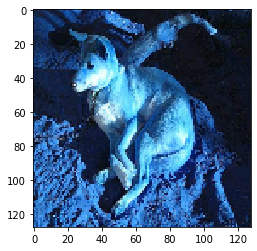

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [15]:
y_train[1]

'dingo'

In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
#obj_df[["make", "make_code"]].head11)

In [17]:
y_train[1]

37

In [18]:
y_train.shape

(10222,)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
import numpy as np
x_train = np.array(x_train).astype('float32')
x_train /= 255

In [20]:
x_train.shape

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=5)

In [0]:
y_train_new = lb.fit_transform(y_train_new)
y_val = lb.fit_transform(y_val)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [24]:
sample = pd.read_csv('/content/drive/My Drive/AIMLDataContent/DogsImages/sample_submission.csv')
sample.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [25]:
sample.columns

Index(['id', 'affenpinscher', 'afghan_hound', 'african_hunting_dog',
       'airedale', 'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=121)

In [26]:
test_img = sample['id']
test_img[0]

'000621fb3cbb32d8935728e48679680e'

Run the below code to load the test image files in x_test_feature

In [27]:
image = cv2.imread('/content/drive/My Drive/AIMLDataContent/DogsImages/test/6387cc2d4dc7a39f3fd9711f7b59f88b.jpg',0)
print(image)

None


In [0]:
sample1 = sample.drop('id',axis=1)
sample1

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,

In [0]:
y_test_feature = sample['id']

In [0]:
y_test_feature

0        000621fb3cbb32d8935728e48679680e
1        00102ee9d8eb90812350685311fe5890
2        0012a730dfa437f5f3613fb75efcd4ce
3        001510bc8570bbeee98c8d80c8a95ec1
4        001a5f3114548acdefa3d4da05474c2e
                       ...               
10352    ffeda8623d4eee33c6d1156a2ecbfcf8
10353    fff1ec9e6e413275984966f745a313b0
10354    fff74b59b758bbbf13a5793182a9bbe4
10355    fff7d50d848e8014ac1e9172dc6762a3
10356    fffbff22c1f51e3dc80c4bf04089545b
Name: id, Length: 10357, dtype: object

In [0]:
y_test_feature.shape

(10357,)

In [0]:
y_test_feature = lb.fit_transform(y_test_feature)

In [0]:
y_train_nrm = tf.keras.utils.to_categorical(y_train)
y_test_nrm = tf.keras.utils.to_categorical(y_test_feature)

In [0]:
y_train_nrm.shape

(10222, 120)

In [0]:
y_test_nrm.shape

(10357, 10357)

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('/content/drive/My Drive/AIMLDataContent/test/{}.jpg'.format(f),1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [01:21<00:00, 126.58it/s]


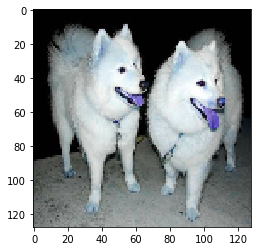

In [0]:
plt.imshow(x_test_feature[1])

Normalize the test data and convert it into 4 dimensions

In [0]:
import numpy as np
x_test_feature = np.array(x_test_feature).astype('float32')
x_test_feature /= 255

#x_test_feature = np.expand_dims(x_test_feature, axis=0)

In [0]:
x_test_feature.shape

(10357, 128, 128, 3)

In [0]:
y_val.shape

(2045,)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#model.add(tf.keras.layers.Reshape((4,)))

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(5,5), #Size of the filter
                                 activation='relu',input_shape=(128,128,3)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))


model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 124, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 952576)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               243859712 
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               3

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Training the model
model.fit(x_train_new,y_train_new, validation_data=(x_val,y_val), epochs=10, batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 55s 7ms/sample - loss: 25.0089 - accuracy: 0.0108 - val_loss: 4.7871 - val_accuracy: 0.0103
Epoch 2/10
8177/8177 [==============================] - 44s 5ms/sample - loss: 4.7865 - accuracy: 0.0115 - val_loss: 4.7866 - val_accuracy: 0.0103
Epoch 3/10
8177/8177 [==============================] - 44s 5ms/sample - loss: 4.7853 - accuracy: 0.0115 - val_loss: 4.7862 - val_accuracy: 0.0103
Epoch 4/10
8177/8177 [==============================] - 44s 5ms/sample - loss: 4.7843 - accuracy: 0.0115 - val_loss: 4.7858 - val_accuracy: 0.0103
Epoch 5/10
8177/8177 [==============================] - 44s 5ms/sample - loss: 4.7832 - accuracy: 0.0115 - val_loss: 4.7854 - val_accuracy: 0.0103
Epoch 6/10
8177/8177 [==============================] - 44s 5ms/sample - loss: 4.7823 - accuracy: 0.0115 - val_loss: 4.7852 - val_accuracy: 0.0103
Epoch 7/10
8177/8177 [==============================] - 44s 5ms/sampl

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
img_size = 128

In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2, shear_range=0.2,zoom_range=0.3,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

In [0]:
img_generator.fit(x_train_new)

In [44]:
model.fit_generator(img_generator.flow(x_train_new, y_train_new, batch_size=32),
                    steps_per_epoch=len(x_train_new) / 32, epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 255.53125 steps
Epoch 1/10
256/255 [==============================] - 61s 239ms/step - loss: 8.7218 - accuracy: 0.0125
Epoch 2/10
256/255 [==============================] - 54s 213ms/step - loss: 4.7851 - accuracy: 0.0133
Epoch 3/10
256/255 [==============================] - 55s 214ms/step - loss: 4.7826 - accuracy: 0.0133
Epoch 4/10
256/255 [==============================] - 54s 213ms/step - loss: 4.7825 - accuracy: 0.0133
Epoch 5/10
256/255 [==============================] - 54s 213ms/step - loss: 4.7797 - accuracy: 0.0133
Epoch 6/10
256/255 [==============================] - 55s 213ms/step - loss: 4.7788 - accuracy: 0.0133
Epoch 7/10
256/255 [==============================] - 54s 211ms/step - loss: 4.7781 - accuracy: 0.0133
Epoch 8/10
256/255 [==============================] - 54s 212ms/step - loss: 4.7774 - accuracy: 0.0133
Epoch 9/10
256/255 [=============================

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = img_generator.flow(x_train_new, y_train_new, batch_size=32)
val_generator = img_generator.flow(x_val, y_val, batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Dogbreeds.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [56]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch= len(x_train_new)/32,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = len(x_val)/32, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 255.53125 steps, validate for 63.90625 steps
Epoch 1/10
256/255 [==============================] - 62s 243ms/step - loss: 4.7755 - accuracy: 0.0133 - val_loss: 4.7946 - val_accuracy: 0.0083
Epoch 2/10
256/255 [==============================] - 62s 243ms/step - loss: 4.7755 - accuracy: 0.0133 - val_loss: 4.7946 - val_accuracy: 0.0083
Epoch 3/10
256/255 [==============================] - 62s 243ms/step - loss: 4.7755 - accuracy: 0.0133 - val_loss: 4.7947 - val_accuracy: 0.0083
Epoch 4/10
256/255 [==============================] - 62s 243ms/step - loss: 4.7755 - accuracy: 0.0133 - val_loss: 4.7947 - val_accuracy: 0.0083
Epoch 5/10
256/255 [==============================] - 62s 243ms/step - loss: 4.7755 - accuracy: 0.0133 - val_loss: 4.7946 - val_accuracy: 0.0083
Epoch 6/10
256/255 [==============================] - 62s 244ms/step - loss: 4.7755 - accuracy: 0.0133 - val_loss: 4.7947 - val_accuracy: 0.0083
Epoch 7/10
256/255 [=====

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= tf.keras.applications.vgg16.VGG16(weights=('/content/drive/My Drive/AIMLDataContent/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [75]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x = base_model.layers[-1].output
x = tf.keras.layers.Flatten()(x)

In [0]:
#Dense layer1
x = tf.keras.layers.Dense(1024, activation='relu')(x)

In [0]:
#Dense layer2
x = tf.keras.layers.Dense(256, activation='relu')(x)

In [0]:
#Dense layer3
x = tf.keras.layers.Dense(120, activation='relu')(x)

In [0]:
base_model = tf.keras.Model(inputs=base_model.input, outputs=x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
# to freeze layers, except the new top layer, of course, which will be added below
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
base_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [82]:
base_model.fit(x_train_new,y_train_new,
            epochs=10,batch_size = 128,
            verbose=1)

Train on 8177 samples
Epoch 1/10
8177/8177 [==============================] - 73s 9ms/sample - loss: 12.1907 - accuracy: 0.0070
Epoch 2/10
8177/8177 [==============================] - 62s 8ms/sample - loss: 12.2267 - accuracy: 0.0066
Epoch 3/10
8177/8177 [==============================] - 62s 8ms/sample - loss: 12.2510 - accuracy: 0.0066
Epoch 4/10
8177/8177 [==============================] - 62s 8ms/sample - loss: 13.1242 - accuracy: 0.0094
Epoch 5/10
8177/8177 [==============================] - 61s 8ms/sample - loss: 13.2750 - accuracy: 0.0094
Epoch 6/10
8177/8177 [==============================] - 62s 8ms/sample - loss: 13.2750 - accuracy: 0.0094
Epoch 7/10
8177/8177 [==============================] - 62s 8ms/sample - loss: 13.2750 - accuracy: 0.0094
Epoch 8/10
8177/8177 [==============================] - 62s 8ms/sample - loss: 13.2750 - accuracy: 0.0094
Epoch 9/10
8177/8177 [==============================] - 62s 8ms/sample - loss: 13.2750 - accuracy: 0.0094
Epoch 10/10
8177/8177 [=